In [ ]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

sns.set_theme(context="paper", style="whitegrid", palette="deep")

def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(total=response["result"]["total"], desc=response["result"]["resource_id"])
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_3c55210de27fcccda2ed0c63fdd2b352")
df.head()

d_3c55210de27fcccda2ed0c63fdd2b352: 100%|██████████| 1262/1262 [00:04<00:00, 301.44it/s]


,_id,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,4,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,5,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [ ]:
# clean "na" values and convert to float
columns_cleaned = [
    "employment_rate_overall",
    "employment_rate_ft_perm",
    "basic_monthly_mean",
    "basic_monthly_median",
    "gross_monthly_mean",
    "gross_monthly_median",
    "gross_mthly_25_percentile",
    "gross_mthly_75_percentile",
]
for c in columns_cleaned:
    df[c] = df[c].replace("na", np.nan)  # replace "na" values with np.nan
    df[c] = df[c].astype(float)

In [65]:
# add university shortname column
df["uni_short"] = df["university"]
df["uni_short"] = df["uni_short"].str.replace("Nanyang Technological University", "NTU")
df["uni_short"] = df["uni_short"].str.replace("National University of Singapore", "NUS")
df["uni_short"] = df["uni_short"].str.replace("Singapore Institute of Technology", "SIT")
df["uni_short"] = df["uni_short"].str.replace("Singapore Management University", "SMU")
df["uni_short"] = df["uni_short"].str.replace("Singapore University of Social Sciences", "SUSS")
df["uni_short"] = df["uni_short"].str.replace("Singapore University of Technology and Design", "SUTD")

<Axes: xlabel='employment_rate_overall', ylabel='uni_short'>

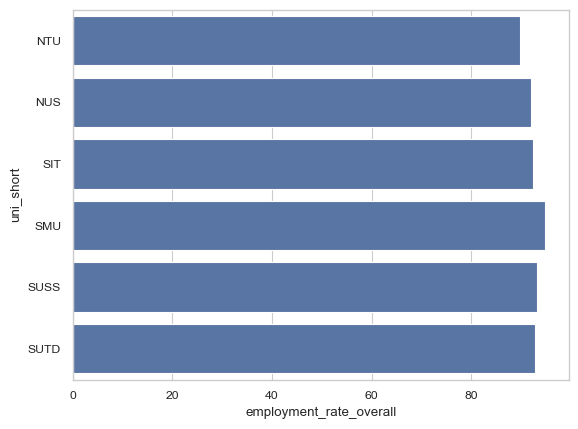

In [66]:
df_plot = df.groupby(["uni_short"])[["employment_rate_overall"]].mean()
sns.barplot(df_plot, x="employment_rate_overall", y="uni_short")

<Axes: xlabel='gross_monthly_median', ylabel='school'>

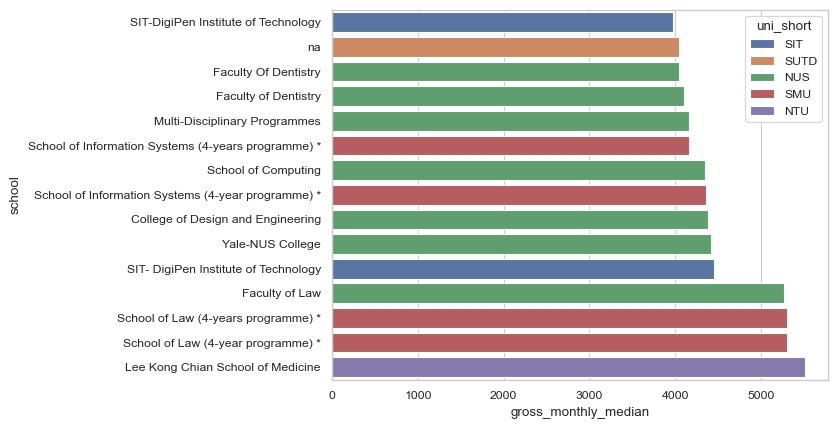

In [ ]:
df_plot = df.groupby(["uni_short", "school"])[["gross_monthly_median"]].mean().sort_values("gross_monthly_median").dropna().tail(15)
sns.barplot(df_plot, x="gross_monthly_median", y="school", hue="uni_short")